In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediction/train.csv
/kaggle/input/diamond-price-prediction/test.csv


In [19]:
test=pd.read_csv('/kaggle/input/diamond-price-prediction/test.csv')
train=pd.read_csv('/kaggle/input/diamond-price-prediction/train.csv')

In [20]:
#Explore the data
train

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


**Display basic information about the dataset**
****

In [21]:
# Display basic information about the dataset
print("Shape of the dataset:", train.shape)
print("\nColumns:", train.columns)
print("\nData types of columns:\n", train.dtypes)

Shape of the dataset: (43152, 11)

Columns: Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

Data types of columns:
 Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [22]:
#Check for duplicated values
train.duplicated().sum()

0

In [23]:
# Check for missing values
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**There is no null values at all**

In [24]:
#43152 rows × 11 columns
for i in train.columns :
    print(f"the number of unique values of \"{i}\" = {train[i].nunique()}")

the number of unique values of "Id" = 43152
the number of unique values of "carat" = 266
the number of unique values of "cut" = 5
the number of unique values of "color" = 7
the number of unique values of "clarity" = 8
the number of unique values of "depth" = 179
the number of unique values of "table" = 121
the number of unique values of "price" = 10640
the number of unique values of "x" = 546
the number of unique values of "y" = 543
the number of unique values of "z" = 368


In [25]:
#split columns for two list >> numaric & categorical
numaric_columns = [c for c in train.columns if train[c].dtype!=object]
categorical_columns = [c for c in train.columns if train[c].dtype==object]

In [26]:
print("numaric_columns >> ",numaric_columns)
print("categorical_columns >> ",categorical_columns)

numaric_columns >>  ['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_columns >>  ['cut', 'color', 'clarity']


In [27]:
df=train
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

**Shows unique objects value**

In [28]:
#43152 rows × 11 columns
for i in df.columns :
    print(f"the number of unique values of \"{i}\" = {train[i].nunique()}")

the number of unique values of "Id" = 43152
the number of unique values of "carat" = 266
the number of unique values of "cut" = 5
the number of unique values of "color" = 7
the number of unique values of "clarity" = 8
the number of unique values of "depth" = 179
the number of unique values of "table" = 121
the number of unique values of "price" = 10640
the number of unique values of "x" = 546
the number of unique values of "y" = 543
the number of unique values of "z" = 368


In [29]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Data Visualization & Preprocessing**

             Id     carat     depth     table     price         x         y  \
Id     1.000000  0.001141 -0.000776 -0.000739 -0.001111 -0.000519  0.001660   
carat  0.001141  1.000000  0.023944  0.182889  0.921911  0.975760  0.947060   
depth -0.000776  0.023944  1.000000 -0.302794 -0.013137 -0.029601 -0.033354   
table -0.000739  0.182889 -0.302794  1.000000  0.128501  0.197342  0.184310   
price -0.001111  0.921911 -0.013137  0.128501  1.000000  0.885181  0.861354   
x     -0.000519  0.975760 -0.029601  0.197342  0.885181  1.000000  0.968954   
y      0.001660  0.947060 -0.033354  0.184310  0.861354  0.968954  1.000000   
z     -0.000981  0.948923  0.090834  0.150746  0.857665  0.965677  0.942670   

              z  
Id    -0.000981  
carat  0.948923  
depth  0.090834  
table  0.150746  
price  0.857665  
x      0.965677  
y      0.942670  
z      1.000000  


<Axes: >

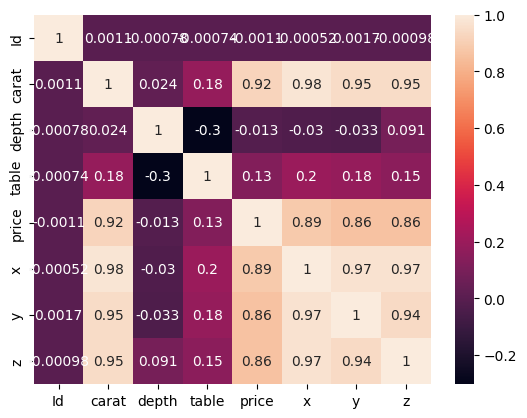

In [32]:
numeric_df = df.select_dtypes(include=['number'])  # Choose only numeric columns
print(numeric_df.corr())
sns.heatmap(numeric_df.corr(), annot=True)

**1- We see here there`s a relation between carat and price exponentialy the correlation is 0.921591.
From correlation we see strong correlation between x, y, z and price, carat.
Strong correlation between carat and the price**


<Axes: xlabel='carat', ylabel='price'>

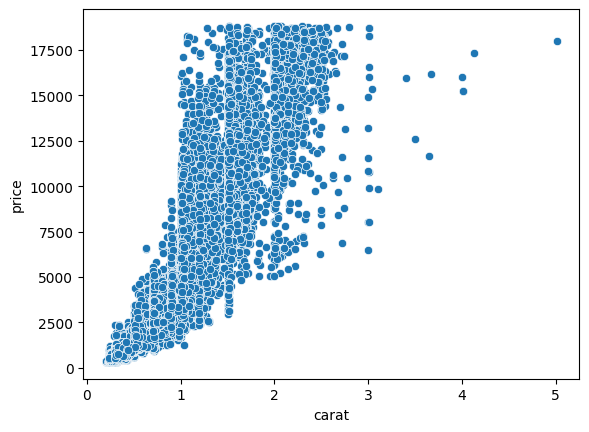

In [30]:
sns.scatterplot(x=df["carat"], y = df["price"])

# As we know that the relation between carat and price goes exponentially that means carat is so important

 We see in that graph there`s some outliers when carat > 3

In [33]:
df[df["carat"] > 3].shape
#About 32 rows

(21, 11)

<Axes: xlabel='x', ylabel='price'>

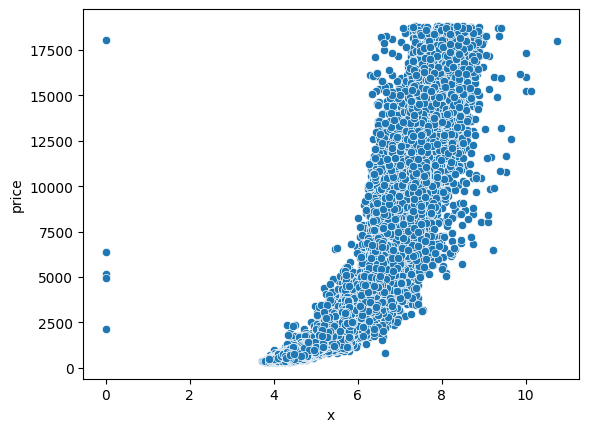

In [34]:
sns.scatterplot(x=df["x"], y = df["price"])

# The relation between x and price seem to goes exponentially.

**We have some outliers when x less than 2 they are.**

In [35]:
df[df["x"] < 2 ].shape
#About 8 rows

(5, 11)

<Axes: xlabel='y', ylabel='price'>

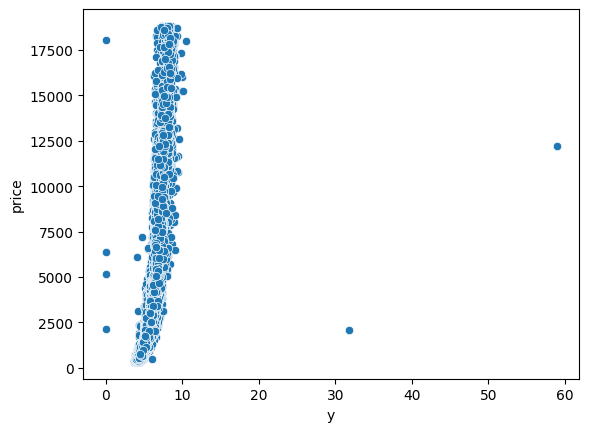

In [36]:
sns.scatterplot(x=df["y"], y = df["price"])

# * We have outliers when y above 30 or y > 30.

In [37]:
df[df["y"] > 30 ].shape
#Only two rows

(2, 11)

In [38]:
df[df["y"] > 30 ]

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
35359,35360,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
40663,40664,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


<Axes: xlabel='z', ylabel='price'>

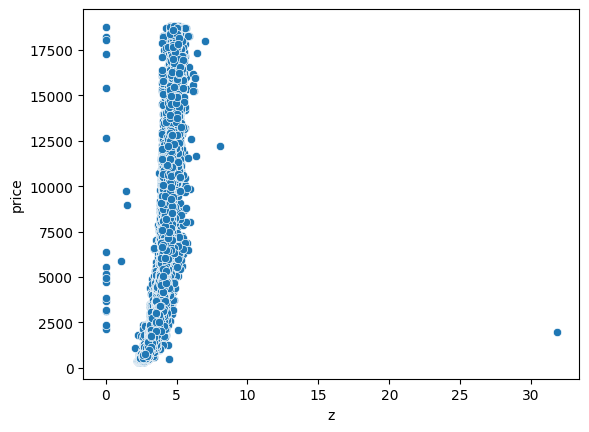

In [39]:
sns.scatterplot(x=df["z"], y = df["price"])

# * We have outliers in z when it is above 30 or z > 30

In [40]:
df[df["z"] > 30 ].shape
#There`s only one row

(1, 11)

<Axes: xlabel='depth', ylabel='price'>

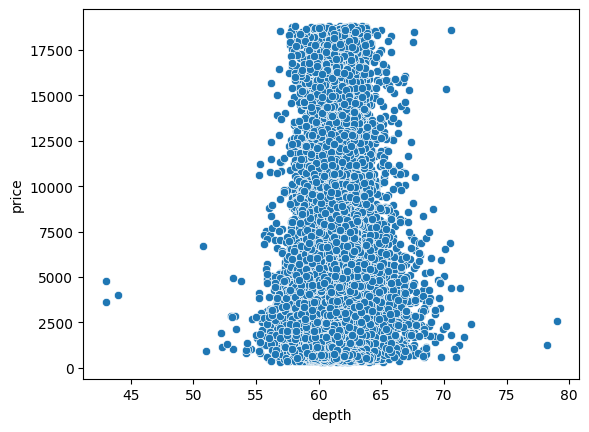

In [41]:
sns.scatterplot(x= df["depth"] , y=df["price"])

# * May it`s an outliers in the relation between depth and price when depth is above 75 and less than 45

In [42]:
df[(df["depth"] > 75) | (df["depth"] < 45 )].shape
#About 6 rows

(5, 11)

<Axes: xlabel='table', ylabel='price'>

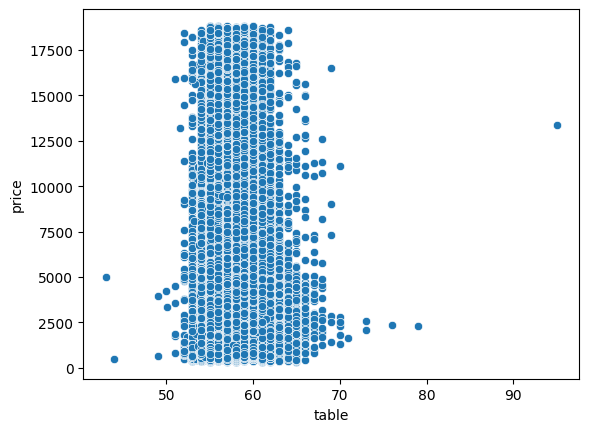

In [43]:
sns.scatterplot(x= df["table"] , y=df["price"])

# Outliers between table and price when table is above 90.

In [44]:
df[df["table"] > 90].shape
#Only one row

(1, 11)

# Work on outliers
**Identifying the outliers indexes**

In [45]:
carat_index = list(df[df["carat"] >= 3].index)
x_index = list(df[df["x"] < 2 ].index)
y_index = list(df[df["y"] > 30 ].index)
z_index = list(df[df["z"] > 30 ].index)
depth_index = list(df[(df["depth"] > 75) | (df["depth"] < 45 )].index)
table_index = list(df[df["table"] > 90].index)

indexes = carat_index + x_index + y_index + z_index + depth_index + table_index
len(indexes)

41

# Delete the outliers

In [46]:
print("DataFrame shape before delete outliers is. ", df.shape)
for outlier in indexes:
    df.drop(outlier, inplace=True)
print("DataFrame shape after deleting outliers. ",df.shape)

DataFrame shape before delete outliers is.  (43152, 11)
DataFrame shape after deleting outliers.  (43111, 11)


# Back to vsuialize numerical data after removing outliers

<Axes: xlabel='carat', ylabel='price'>

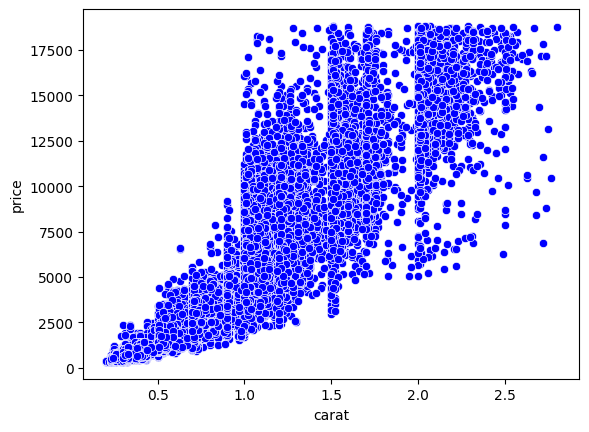

In [49]:
sns.scatterplot(x=df["carat"], y = df["price"], color='b')

# It lokes like better

<Axes: xlabel='x', ylabel='price'>

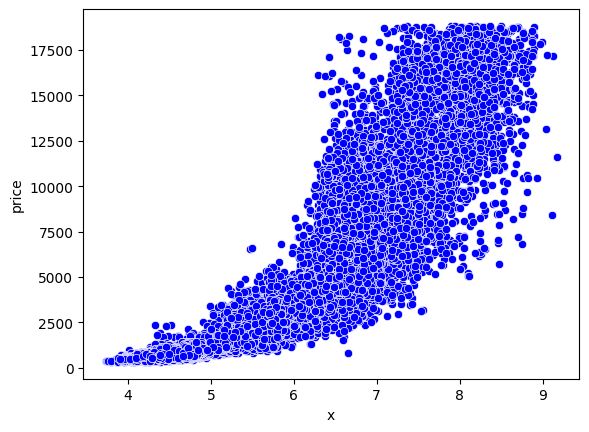

In [51]:
sns.scatterplot(x=df["x"], y = df["price"], color='b')

<Axes: xlabel='y', ylabel='price'>

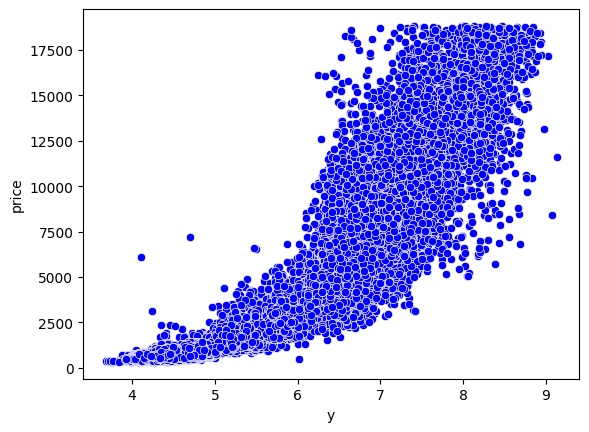

In [52]:
sns.scatterplot(x=df["y"], y = df["price"], color='b')

# * Note that: before removing outliers the relation between y and the price isn`t clear but after removing some outliers it seems like it goes exponentially.

<Axes: xlabel='z', ylabel='price'>

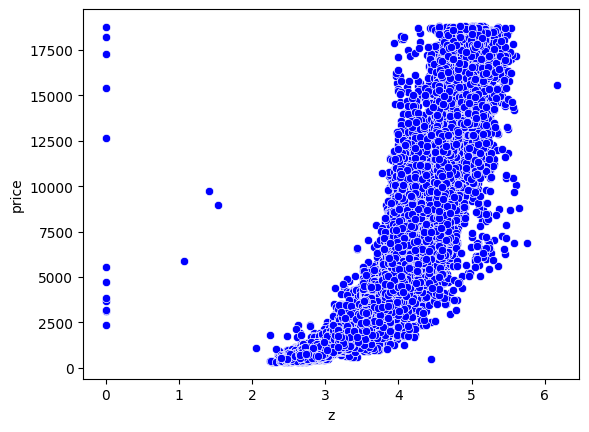

In [54]:
sns.scatterplot(x=df["z"], y = df["price"], color='b')

# Seem still some outliers when z < 2

In [56]:
z_index2 = list(df[df["z"] < 2].index)
for i in z_index2:
    df.drop(i, inplace=True)

<Axes: xlabel='z', ylabel='price'>

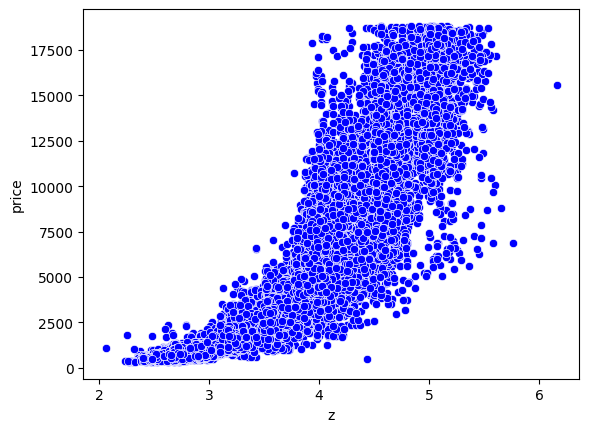

In [57]:
sns.scatterplot(x=df["z"], y = df["price"], color='b')

# the relation between z and price now goes exponentially just like x and y, now z is clear.

<Axes: xlabel='depth', ylabel='price'>

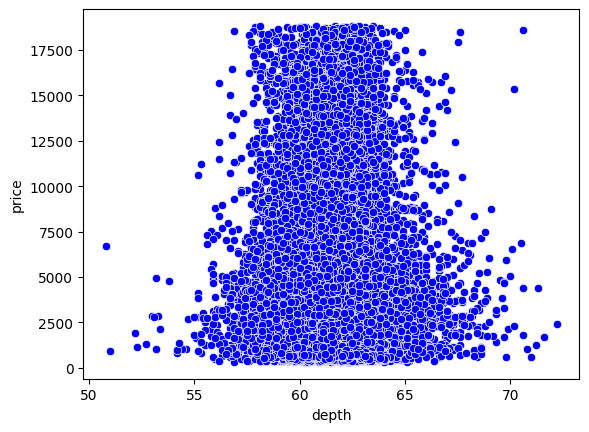

In [58]:
sns.scatterplot(x= df["depth"] , y=df["price"], color='b')

<Axes: xlabel='table', ylabel='price'>

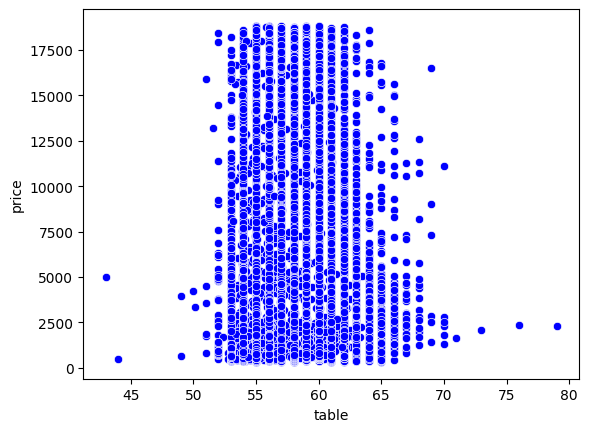

In [59]:
sns.scatterplot(x= df["table"] , y=df["price"], color='b')

# # Categorical data

# Coutplot on the three categorical data

In [61]:
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='cut', ylabel='count'>

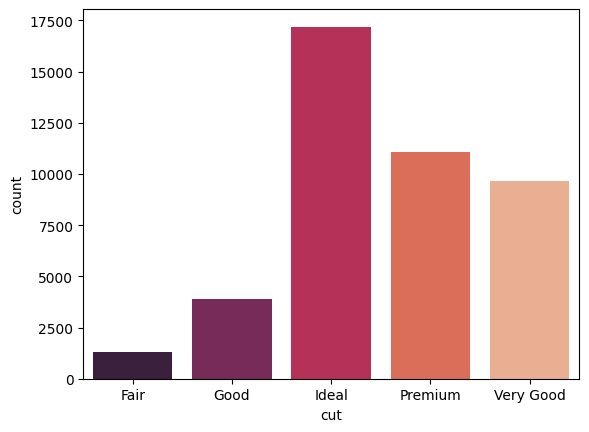

In [63]:
# Assuming 'df' is your DataFrame
df["cut"] = df["cut"].astype('category')  # Convert 'cut' column to categorical type

# Plot countplot
sns.countplot(data=df, x="cut", palette='rocket')


<Axes: xlabel='clarity', ylabel='count'>

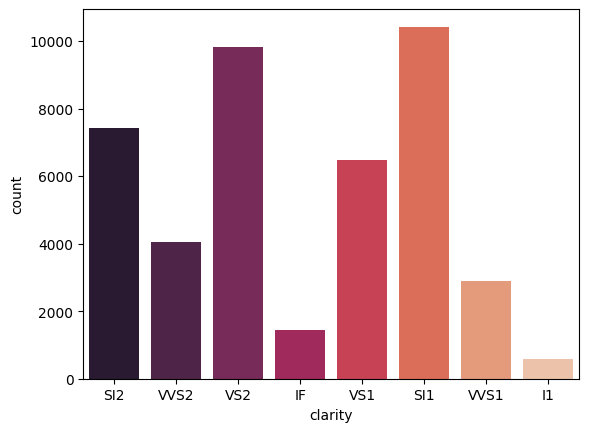

In [64]:
# Assuming 'df' is your DataFrame
sns.countplot(data=df, x="clarity", palette='rocket')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='color', ylabel='count'>

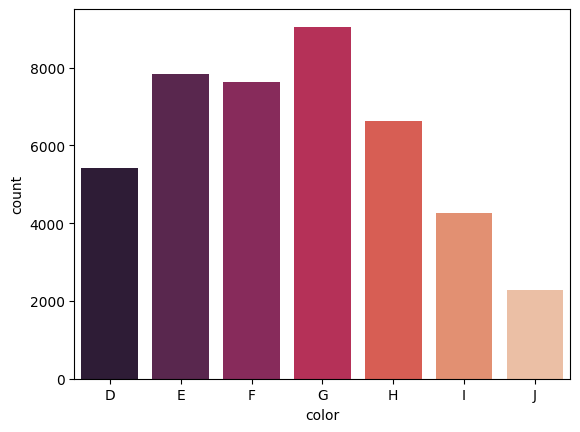

In [66]:
# Assuming 'df' is your DataFrame
df["color"] = df["color"].astype('category')  # Convert 'color' column to categorical type

# Plot countplot
sns.countplot(data=df, x="color", palette='rocket')

# Domain knowledge
The 4C`s.
**We go through these types of diamond charactirstics**

* Carat
* Cut
* Clarity
* Color
And we show the relationship between those

* 1- Carat and price.
* 2- Cut and price.
* 3- Clarity and price.
* 4- Color and price.
**Additionally we have dimension x, y, z related with price and it had strong correlation between them and the price

Finally relation between the 4C`s

4C`s: 1st one is Carat
To predict the price**

* We know that carat and price correlation is 0.921591.
* We see that the relation between carat and price is exponentioally not linear.
* and we see here there`s some outliers when the carat == 4 or above that.
* let`s see its indexes.
* **Carat Details**

carat noun 1. a measure of the quality of gold. Pure gold is 24 carats. A 22-carat gold ring 2. a measure of the weight of precious stones a 5-carat diamond (NOTE: Another US spelling is karat.)
Carat is refers to its weight not size and better weight is better than smaller.
Carat weight isn`s related to the sparkle, and the sparkle is a bright light, beautiful sparkle is related to the good cut
the relationship betwwn carat weight and price is depends on rarity or availability of a rough crystal.
carat is also a function of finding rough crystals with desirable color and external and internal characteristics that influenced clarity when diamond is cut.
Rough crystals: are rugged an untouched by humans and machine and hence, the most scared from gemstone

Size it is a term that basically refers to either length area or volume (i.e how big an objet is). Weight it is the force of gravity on your body

**Cut details**
* * cut is the most important, the better cut the more diamond sparkle.
* * Diamond has 4 great parts " Table, Crown, Gridle, Pavilion.
*  even though the diamond has perfect color and clarity a diamond with a poor cut will dulled brilliance.

In [68]:
depth = df["z"] / ((df["x"] + df["y"])/2) * 100
pd.DataFrame(depth, columns=["Depth size in percent"]).head(15)

,Depth size in percent
0,61.807137
1,60.945946
2,61.312217
3,61.287224
4,60.975610
5,63.080685
6,61.795775
7,61.270670
8,60.941828
9,59.817352


# Converting Categorical Data (CCD)

In [69]:
df.head(2)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51


In [70]:
def grade(x):
    x = str(x)
    if x == "Fair":
        return 1
    elif x == "Good":
        return 2
    elif x == "Very Good":
        return 3
    elif x == "Premium":
        return 4
    elif x == "Ideal":
        return 5

In [71]:
df["cut_grade"] = df["cut"].apply(grade)
df["cut_grade"].unique()

[5, 4, 3, 1, 2]
Categories (5, int64): [1, 2, 5, 4, 3]

In [73]:
def color_grade(x):
    x = str(x)
    if x == "J":
        return 1
    elif x == "I":
        return 1
    elif x == "H":
        return 2
    elif x == "G":
        return 3
    elif x == "F":
        return 4
    elif x == "E":
        return 5
    elif x == "D":
        return 6

# Color grades order: D > E > F > G > H > I, J

In [74]:
df["color_grade"] = df["color"].apply(color_grade)
df["color_grade"].unique()

array([1, 3, 4, 2, 6, 5])

# Clarity quality order: IF > VVS2 or VVS1 > VS1 or VS2 > SI1 or SI2 > I1

* Flawless Diamonds
* FL & IF Diamonds (Rare Finds)
* Slightly Included Diamonds
* VVS Diamonds (Excellent Quality)
*  VS & SI Diamonds (Best Value & Most Popular)

In [75]:
def clarity_quality(x):
    x = str(x)
    if x == "I1":
        return 1
    elif x == "SI2":
        return 2
    elif x == "SI1":
        return 3
    elif x == "VS2":
        return 4
    elif x == "VS1":
        return 5
    elif x == "VVS2":
        return 6
    elif x == "VVS1":
        return 7
    elif x == "IF":
        return 8

In [76]:
df["clear_quality"] = df["clarity"].apply(clarity_quality)
df["clear_quality"].unique()

array([2, 6, 4, 8, 5, 3, 7, 1])

# Drop un-wanted columns

In [77]:
df.drop(["cut","color","clarity","depth","table"], inplace=True, axis=1)
#Final DataFrame
df.head(2)

,Id,carat,price,x,y,z,cut_grade,color_grade,clear_quality
0,1,1.06,4270,6.57,6.60,4.07,5,1,2
1,2,1.51,15164,7.38,7.42,4.51,4,3,6


# Machine Learning

In [78]:
df.head()

,Id,carat,price,x,y,z,cut_grade,color_grade,clear_quality
0,1,1.06,4270,6.57,6.60,4.07,5,1,2
1,2,1.51,15164,7.38,7.42,4.51,4,3,6
2,3,0.32,828,4.43,4.41,2.71,5,4,4
3,4,0.53,1577,5.19,5.22,3.19,5,3,4
4,5,0.70,2596,5.76,5.72,3.50,4,2,6


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Encoding